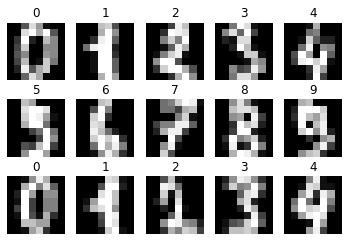

In [2]:
from sklearn import datasets

digits = datasets.load_digits()

import matplotlib.pyplot as plt

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis('off')
    plt.title(f'{digits.target[i]}')
    plt.imshow(digits.images[i], cmap='gray')
plt.show()

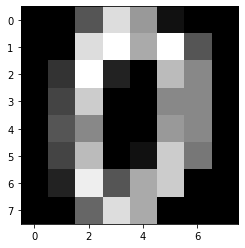

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
d0 = digits.images[0]
plt.imshow(d0, cmap='gray')
plt.show()
print(d0)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score

# データ
x = digits.images
y = digits.target

# 二次元を一次元に
x = x.reshape((-1, 64))

# 学習用とテスト用に分離
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 学習
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

# 予測
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9611111111111111


In [11]:
from sklearn.externals import joblib

joblib.dump(clf, 'digits.pkl')

['digits.pkl']

In [12]:
clf = joblib.load('./digits.pkl')

y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9611111111111111


3 = 5


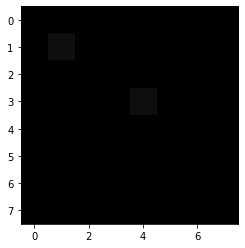

In [17]:
import cv2

def predict(filename):
    # モデル
    clf = joblib.load('./digits.pkl')
    # 画像
    img = cv2.imread(filename)
    # 整形
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (8, 8))
    # ネガポジ反転
    img = 15 - img // 16
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # 二次元を一次元に
    img = img.reshape((-1, 64))
    # 予測
    ret = clf.predict(img)
    return ret[0]

n = predict('./3.png')
print(f'3 = {n}')

9 = 9


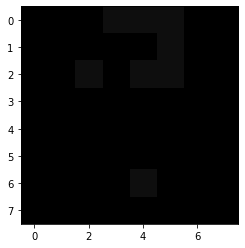

In [18]:
n = predict('./9.png')
print(f'9 = {n}')